In [1]:
!pip install wget
import wget 
! wget --no-check-certificate -r 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Kindle_Store_5.json.gz' -O review

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=aeed8c7afc7dfddc7306aaf1df87a14a54f4d688f40d9f0d11a3e678408ed062
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
will be placed in the single file you specified.

--2020-03-21 09:11:21--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Kindle_Store_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272179168 (260M) [application/x-gzip]
Saving to: ‘review’

review              100%[===================>] 259.57M  9.36MB/s    in 18s     

2020-03-21 09:11:39 (14.3 MB/s) - ‘review’ saved [272179168/272179168]

FINISHED --2020-03-21 09:11:39--
Total wall clock time: 18s
Downloaded: 1 files, 260M in 18s (14.3 MB/s)


In [0]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/review')

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"


In [4]:
df.shape

(982619, 9)

In [0]:
df=df[:10000]

In [6]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [7]:
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [8]:
df['overall'].value_counts()

5.0    4631
4.0    2963
3.0    1403
2.0     578
1.0     425
Name: overall, dtype: int64

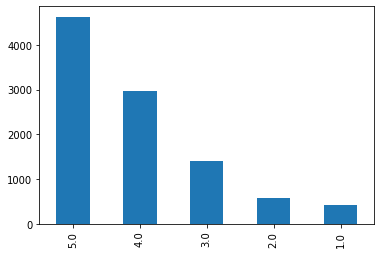

In [9]:
df['overall'].value_counts().plot.bar()

In [0]:
df['overall']=df['overall'].astype('float32')

In [11]:
df['overall'].dtype

dtype('float32')

In [0]:
def review_type(x):
  if x > 3.0:
    return 'positive'
  elif x == 3.0:
    return 'neutral'
  else:
    return 'negative'
  

In [0]:
df['review_type']=df['overall'].apply(review_type)

In [14]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_type
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014",positive
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014",positive
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014",positive
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014",positive
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014",positive


In [15]:
df['review_type'].value_counts()

positive    7594
neutral     1403
negative    1003
Name: review_type, dtype: int64

In [0]:
new_df=df.loc[:,['reviewText','review_type']]

In [17]:
new_df.head()

,reviewText,review_type
0,I enjoy vintage books and movies so I enjoyed ...,positive
1,This book is a reissue of an old one; the auth...,positive
2,This was a fairly interesting read. It had ol...,positive
3,I'd never read any of the Amy Brewster mysteri...,positive
4,"If you like period pieces - clothing, lingo, y...",positive


In [18]:
new_df.isnull().sum()

reviewText     0
review_type    0
dtype: int64

In [0]:
from sklearn.utils import shuffle

In [0]:
new_df=shuffle(new_df)

In [0]:
raw=[]
for text in new_df.reviewText:
    raw.append(text)

In [0]:
import re
import string
raw1=[]
for text in raw:
    text=text.lower()
    for z in text:
        if  z in string.punctuation:
            text=text.replace(z,'')
    raw1.append(text)

In [0]:
def clean_text(text):
    text=re.sub("[0-9]+","/DIG/",text)
    
    return text

In [0]:
raw2=[clean_text(text) for text in raw1]


In [25]:
raw2[1]

'great /DIG/ nd book in the series marc and kelly are true mates and lissa vision come true in this follow up book'

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

Using TensorFlow backend.


In [0]:
y=new_df.loc[:,'review_type']

In [0]:
le=LabelEncoder()
onehot=OneHotEncoder()
y=le.fit_transform(y).reshape(-1,1)
y=onehot.fit_transform(y).toarray()

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(raw2)

In [0]:
seq=tokenizer.texts_to_sequences(raw2)

In [0]:
max_len_input=max(len(s) for s in seq)

In [32]:
max_len_input

2146

In [0]:
input_sequence=pad_sequences(seq,maxlen=50,padding='post')

In [34]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2020-03-21 09:12:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-21 09:12:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-21 09:12:43--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [35]:
!unzip glove*.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [36]:
print('Indexing word vectors.')
import numpy as np

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [0]:

num_words_input=len(tokenizer.word_index)+1
word2idx_input=tokenizer.word_index
MAX_NUM_WORDS=40000
num_words=num_words_input
embedding_matrix=np.zeros((num_words,100))
for word,i in word2idx_input.items():
    if i<MAX_NUM_WORDS:
        embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(input_sequence,y,test_size=0.3,random_state=42)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout

In [40]:
vocab_size=len(tokenizer.word_index) + 1
vocab_size

39970

In [41]:
model=Sequential()
model.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=50))

In [42]:
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
r=model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 38s 5ms/step - loss: 0.6863 - acc: 0.7590 - val_loss: 0.6257 - val_acc: 0.7600
Epoch 2/10
7000/7000 [==============================] - 35s 5ms/step - loss: 0.5417 - acc: 0.7810 - val_loss: 0.5741 - val_acc: 0.7730
Epoch 3/10
7000/7000 [==============================] - 35s 5ms/step - loss: 0.4382 - acc: 0.8149 - val_loss: 0.5676 - val_acc: 0.7713
Epoch 4/10
7000/7000 [==============================] - 35s 5ms/step - loss: 0.3424 - acc: 0.8579 - val_loss: 0.7360 - val_acc: 0.7553
Epoch 5/10
7000/7000 [==============================] - 35s 5ms/step - loss: 0.2484 - acc: 0.9030 - val_loss: 0.7447 - val_acc: 0.7503
Epoch 6/10
7000/7000 [==============================] - 35s 5ms/step - loss: 0.1796 - acc: 0.9334 - val_loss: 0.8512 - val_acc: 0.7367
Epoch 7/10
7000/7000 [========================

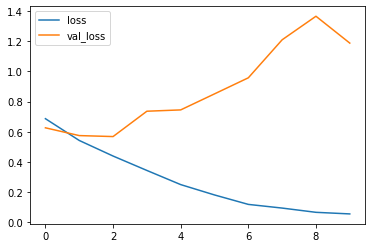

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [46]:
model.evaluate(xtest,ytest)

3000/3000 [==============================] - 5s 2ms/step


[1.1885797004699707, 0.7076666668256124]

In [0]:
model.save('model1.h5')

In [0]:
from keras.models import load_model
model=load_model('model1.h5')

In [0]:
import numpy as np

def predict(data):
  predict_class=model.predict_classes(xtest)
  prob=model.predict_proba(data,batch_size=None)
  return predict_class,prob

In [54]:
predict(xtest)

(array([2, 1, 1, ..., 1, 2, 1]),
 array([[2.3504346e-05, 1.7291422e-04, 9.9980360e-01],
        [9.6830074e-03, 9.8335326e-01, 6.9637676e-03],
        [4.2182966e-03, 9.8989081e-01, 5.8908681e-03],
        ...,
        [4.6692677e-03, 9.8204160e-01, 1.3289125e-02],
        [7.2705607e-06, 6.7732486e-05, 9.9992502e-01],
        [4.0543345e-03, 7.4533373e-01, 2.5061193e-01]], dtype=float32))